<a href="https://colab.research.google.com/github/khee11/testrepository/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 1 
tensorflow의 gradient tape 을 사용하여 아래 문제들을 풀어보세요

EX)
```
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
```

### Q1  $y = x^2 + 3x + 1$ 의 수식을  $x$ (a scalar variable) 에 대해 미분해보세요.

In [53]:
import tensorflow as tf
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  y = tf.square(x) + 3*x + 1
gradient = tape.gradient(y, x)

print("x=",x.numpy(),"일 때 x에 대한 미분값은", gradient.numpy())

x= 3.0 일 때 x에 대한 미분값은 9.0


### Q2 $y = X^3 + 3X + 5$ 의 수식을  $X$ (a 2 by 2 matrix variable) 에 대해 미분해보세요.

In [58]:
import tensorflow as tf
x = tf.Variable(initial_value=[(3.,2.),(1.,2.)])
with tf.GradientTape() as tape:
  y = tf.matmul(tf.matmul(x,x),x) + 3*x + 5
gradient = tape.gradient(y, x)

print("x = \n",x.numpy(),"일 때 \n X에 대한 미분값은 \n", gradient.numpy())

x = 
 [[3. 2.]
 [1. 2.]] 일 때 
 X에 대한 미분값은 
 [[60. 42.]
 [60. 42.]]


### Q3 $z = X^3 y^2 + 3X + 2yX + 1$ 의 수식을  $X$ (a 2 by 2 matrix variable)와 $y$ (a scalar variable) 에 대해 미분해보세요.

In [59]:
import tensorflow as tf
x = tf.Variable(initial_value=[(3.,2.),(1.,2.)])
y = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  z = tf.matmul(tf.matmul(x,x),x)*tf.square(y) + 3*x + 2*x*y + 1
gradient_x = tape.gradient(z, x).numpy()

with tf.GradientTape() as tape:
  z = tf.matmul(tf.matmul(x,x),x)*tf.square(y) + 3*x + 2*x*y + 1
gradient_y = tape.gradient(z, y).numpy()

print("x = \n",x.numpy(),"일 때 \n X에 대한 미분값 : ", "\n", gradient_x, "\n", "y에 대한 미분값 : \n", gradient_y)

x = 
 [[3. 2.]
 [1. 2.]] 일 때 
 X에 대한 미분값 :  
 [[522. 360.]
 [522. 360.]] 
 y에 대한 미분값 : 
 784.0


### 아래 코드는 수업시간에 배운 예제 코드입니다. 코드를 참고하여 문제들을 풀어보세요.

In [71]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [72]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [73]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [75]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [76]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [77]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5580 - accuracy: 0.7743 - val_loss: 0.4363 - val_accuracy: 0.8605
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3509 - accuracy: 0.8957 - val_loss: 0.3281 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2522 - accuracy: 0.9203 - val_loss: 0.2884 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1962 - accuracy: 0.9350 - val_loss: 0.2727 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1569 - accuracy: 0.9497 - val_loss: 0.2754 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1299 - accuracy: 0.9587 - val_loss: 0.2931 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1080 - accuracy: 0.9685 - val_loss: 0.3002 - val_accuracy: 0.8858
Epoch 8/20
30

In [78]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

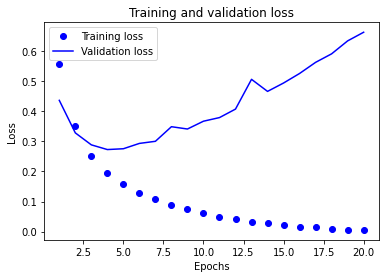

In [79]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [80]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4373 - accuracy: 0.8306
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2525 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1946 - accuracy: 0.9315
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3190 - accuracy: 0.8760


### Q4 모델에 hidden layer(dense layer)들을 늘려서 evaluation 결과를 확인해보세요. (2번째 트레이닝 때의 epoch 갯수는 상황에 맞게 조절해주세요.)

In [81]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, y_test)
print(results, results2)

Epoch 1/7
30/30 [==============================] - 3s 50ms/step - loss: 0.5447 - accuracy: 0.7786 - val_loss: 0.4049 - val_accuracy: 0.8699
Epoch 2/7
30/30 [==============================] - 1s 45ms/step - loss: 0.3143 - accuracy: 0.9012 - val_loss: 0.3053 - val_accuracy: 0.8874
Epoch 3/7
30/30 [==============================] - 1s 33ms/step - loss: 0.2118 - accuracy: 0.9319 - val_loss: 0.3133 - val_accuracy: 0.8780
Epoch 4/7
30/30 [==============================] - 1s 31ms/step - loss: 0.1614 - accuracy: 0.9479 - val_loss: 0.3290 - val_accuracy: 0.8783
Epoch 5/7
30/30 [==============================] - 1s 24ms/step - loss: 0.1287 - accuracy: 0.9594 - val_loss: 0.3318 - val_accuracy: 0.8747
Epoch 6/7
30/30 [==============================] - 1s 47ms/step - loss: 0.1052 - accuracy: 0.9671 - val_loss: 0.3263 - val_accuracy: 0.8804
Epoch 7/7
30/30 [==============================] - 1s 31ms/step - loss: 0.0773 - accuracy: 0.9774 - val_loss: 0.3820 - val_accuracy: 0.8782


### Q5 Dense layer 들의 output 차원을 16에서 32이로 증가시켜본 후 evaluation 결과를 확인해보세요. (2번째 트레이닝 때의 epoch 갯수는 상황에 맞게 조절해주세요.)

In [87]:
model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results3 = model3.evaluate(x_test, y_test)
print(results, results2, results3)

Epoch 1/7
30/30 [==============================] - 3s 68ms/step - loss: 0.4921 - accuracy: 0.7752 - val_loss: 0.3421 - val_accuracy: 0.8774
Epoch 2/7
30/30 [==============================] - 1s 28ms/step - loss: 0.2721 - accuracy: 0.9035 - val_loss: 0.2838 - val_accuracy: 0.8903
Epoch 3/7
30/30 [==============================] - 1s 30ms/step - loss: 0.1997 - accuracy: 0.9311 - val_loss: 0.3112 - val_accuracy: 0.8757
Epoch 4/7
30/30 [==============================] - 1s 25ms/step - loss: 0.1544 - accuracy: 0.9474 - val_loss: 0.2847 - val_accuracy: 0.8884
Epoch 5/7
30/30 [==============================] - 1s 25ms/step - loss: 0.1224 - accuracy: 0.9589 - val_loss: 0.2978 - val_accuracy: 0.8870
Epoch 6/7
30/30 [==============================] - 1s 21ms/step - loss: 0.0941 - accuracy: 0.9696 - val_loss: 0.3301 - val_accuracy: 0.8811
Epoch 7/7
782/782 [==============================] - 3s 4ms/step - loss: 0.4987 - accuracy: 0.8393
[0.3190236985683441, 0.8759999871253967] [0.4116821885108948,

### Q6 모형을 조금씩 바꿔보면서 성능을 확인해보고, 좋아 보이는 모형하나를 제안해주세요. 